<a href="https://colab.research.google.com/github/Mac98M/MachineLearning2024_DrAliyari_KNTUCourse/blob/main/HomeWorks/HW1/Code/masihmokhtari_ml_miniproj1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Masih Mokhtari _ Miniproj1**
**Q2**

in tis question we have to download our dataset according to our student number. my student number is 40211454 so i have to download normal_02 and fault data IR007_02 that file names are 99 and 107.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import joblib
import os
#import mlxtend

from sklearn.datasets import make_classification , make_blobs , make_circles
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_decision_regions

from mlxtend.plotting import plot_decision_regions

from drawdata import ScatterWidget

from imblearn.over_sampling import SMOTE

from IPython.display import clear_output

import seaborn as sns

from scipy.io import whosmat
from scipy.io import loadmat
from scipy import stats

In [ ]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

## 2-1 Download dataset

In [ ]:
#for download these dataset
#file 99 address (normal data): https://drive.google.com/file/d/15fxFqhugcNqJiVKk5eb3WvwgxQqk5JKG/view?usp=drive_link
#file 107 address (fault data): https://drive.google.com/file/d/1x0xYHe-a_Ta1Rt3ugT0PK3teUH_pctiq/view?usp=sharing

!pip install --upgrade --no-cache-dir gdown
!gdown 15fxFqhugcNqJiVKk5eb3WvwgxQqk5JKG
!gdown 1x0xYHe-a_Ta1Rt3ugT0PK3teUH_pctiq

Downloading...
From (original): https://drive.google.com/uc?id=15fxFqhugcNqJiVKk5eb3WvwgxQqk5JKG
From (redirected): https://drive.google.com/uc?id=15fxFqhugcNqJiVKk5eb3WvwgxQqk5JKG&confirm=t&uuid=8f4eeae8-09e6-4003-8d07-cb84702d1994
To: /mnt/f/Users/Mac/5.KNTU/402-403-2/1.Machine_Learning/HW/hw-2-miniproject1/Code/version2/99.mat
100%|███████████████████████████████████████| 15.5M/15.5M [00:21<00:00, 716kB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1x0xYHe-a_Ta1Rt3ugT0PK3teUH_pctiq
From (redirected): https://drive.google.com/uc?id=1x0xYHe-a_Ta1Rt3ugT0PK3teUH_pctiq&confirm=t&uuid=994da09e-ba53-4b0e-b4ec-a87081ef01fa
To: /mnt/f/Users/Mac/5.KNTU/402-403-2/1.Machine_Learning/HW/hw-2-miniproject1/Code/version2/107.mat
100%|███████████████████████████████████████| 2.93M/2.93M [00:03<00:00, 774kB/s]


## 2-2 Load and Prepare Dataset

In [ ]:
# Loading normal data
data_n = loadmat('99.mat')
cols_n = list(data_n.keys())[-4:]

# Loading fault data
data_f = loadmat('107.mat')
cols_f = list(data_f.keys())[-4:-1]

In [ ]:
print(f"Normal Data:\n{cols_n}", end='\n\n')
print(f'Fault Data:\n{cols_f}')

Normal Data:
['X098_DE_time', 'X098_FE_time', 'X099_DE_time', 'X099_FE_time']

Fault Data:
['X107_DE_time', 'X107_FE_time', 'X107_BA_time']


In [ ]:
M = 300
N = 300
all_cols = np.concatenate((cols_n,cols_f))

matrices = dict()
for i in range(len(all_cols)):

    mat = np.zeros((M,N))
    for j in range(M):

        try:
            mat[j,:] = data_n[all_cols[i]][j:j+N].reshape(-1,)
        except:
            mat[j,:] = data_f[all_cols[i]][j:j+N].reshape(-1,)
    matrices[all_cols[i]] = mat

In [ ]:
for i,col in enumerate(all_cols):

    mat_size = matrices[col].shape
    print(f'Class "{col}"\'s matrix has the shape of {mat_size}')

Class "X098_DE_time"'s matrix has the shape of (300, 300)
Class "X098_FE_time"'s matrix has the shape of (300, 300)
Class "X099_DE_time"'s matrix has the shape of (300, 300)
Class "X099_FE_time"'s matrix has the shape of (300, 300)
Class "X107_DE_time"'s matrix has the shape of (300, 300)
Class "X107_FE_time"'s matrix has the shape of (300, 300)
Class "X107_BA_time"'s matrix has the shape of (300, 300)


In [ ]:
normal_mat = matrices['X099_DE_time']
fault_mat = matrices['X107_DE_time']

In [ ]:
class Features:

    def __init__(self,matrix):
        self.matrix = matrix
        self._extract()

    def _extract(self):

        self.features = {
            'standard deviation': stats.tstd(self.matrix, axis=1),
            'peak': np.max(self.matrix, axis=1),
            'skewness': stats.skew(self.matrix, axis=1),
            'mean': np.mean(self.matrix, axis=1),
            'absolute mean': np.mean(np.abs(self.matrix), axis=1),
            'root mean square': np.sqrt(np.mean(np.square(self.matrix), axis=1)),
            'square root mean': np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'kurtosis': stats.kurtosis(self.matrix, axis=1),
            'crest factor': np.max(self.matrix, axis=1) / np.sqrt(np.mean(np.square(self.matrix), axis=1)),
            'clearance factor': np.max(self.matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'peak to peak': np.max(self.matrix, axis=1) - np.min(self.matrix, axis=1),
            'shape factor': np.sqrt(np.mean(np.square(self.matrix), axis=1)) / np.mean(np.abs(self.matrix), axis=1),
            'impact factor': np.sqrt(np.mean(np.square(self.matrix), axis=1)) / np.mean(np.abs(self.matrix), axis=1),
            'impulse factor': np.abs(np.mean(self.matrix, axis=1)) / np.mean(np.abs(self.matrix), axis=1)
        }

    def __getitem__(self,key):
        return self.features[key]


normal_features = Features(normal_mat)
fault_features = Features(fault_mat)

In [ ]:
# Create dataframe for normal data ( Normal data label ---> 0 )
df_normal = pd.DataFrame(normal_features.features)
df_normal['label'] = np.zeros((df_normal.shape[0],), dtype='int8')
# Create dataframe for faulty data ( Fault data label --> 1 )
df_fault = pd.DataFrame(fault_features.features)
df_fault['label'] = np.ones((df_fault.shape[0],), dtype='int8')

# Stacking both datasets
df = pd.concat ([df_normal, df_fault], ignore_index=True)
df.head()

,standard deviation,peak,skewness,mean,absolute mean,root mean square,square root mean,kurtosis,crest factor,clearance factor,peak to peak,shape factor,impact factor,impulse factor,label
0,0.058498,0.179826,-0.055605,0.015461,0.046085,0.060412,0.037528,0.492086,2.976653,4.791810,0.355481,1.310902,1.310902,0.335496,0
1,0.058476,0.179826,-0.043412,0.015163,0.045954,0.060316,0.037406,0.495332,2.981411,4.807449,0.355481,1.312514,1.312514,0.329954,0
2,0.058415,0.179826,-0.035048,0.014961,0.045753,0.060206,0.037147,0.507955,2.986838,4.840926,0.355481,1.315903,1.315903,0.327001,0
3,0.058431,0.179826,-0.042994,0.015128,0.045891,0.060264,0.037337,0.504756,2.984002,4.816312,0.355481,1.313202,1.313202,0.329656,0
4,0.058434,0.179826,-0.056066,0.015472,0.045996,0.060353,0.037427,0.505429,2.979557,4.804676,0.355481,1.312159,1.312159,0.336387,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1, inplace=False).values,
    df.label.values,
    test_size = 0.2,
    shuffle = True,
    random_state = 54
)
print(f'test size: {len(y_test)/(len(y_train)+len(y_test))}')
print(f'x_train shape : {x_train.shape}, y_train shape :{y_train.shape}')
print(f'x_test shape : {x_test.shape}, y_test :{y_test.shape}')

test size: 0.2
x_train shape : (480, 14), y_train shape :(480,)
x_test shape : (120, 14), y_test :(120,)


In [ ]:
#Normalizing data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train = x_train_scaled
x_test_scaled = scaler.transform(x_test)
x_test = x_test_scaled

## 2-3 impleament model

### 2-3-1 Logistic Regression from scratch

In [ ]:
class LogisticRegression_fs:

    def __init__(self, n_iter=10, learning_rate=0.01, random_state=None):
        self.n_iter = n_iter
        self.eta = learning_rate
        np.random.seed(random_state)

    def _weight_init(self):
        self.w = np.random.rand(14)*0
        self.b = np.random.rand()

    def _update(self,x,E):
        dj = np.dot(x.T,E)
        self.w += self.eta*dj
        self.b += self.eta*np.sum(E)

    def forward(self,x):
        z = np.dot(x,self.w) + self.b
        a = 1/(1+np.e**(-z))
        y_hat = np.array([1 if hat>.5 else 0 for hat in a])
        return y_hat

    def error(self,predict,true):
        E = true - predict
        e = 1/len(true) * np.dot(E,E)
        return E,e

    def train(self,x,y):
        self._weight_init()
        self.loss = []
        for iter in range(self.n_iter):

            y_hat = self.forward(x)
            E,e = self.error(y_hat,y)
            self.loss.append(e)
            self._update(x,E)

# Train model with data
lgr_model = LogisticRegression_fs(n_iter = 100, learning_rate =0.0001, random_state = 54)
lgr_model.train(x_train,y_train)

Text(0.5, 0, 'Iteration')

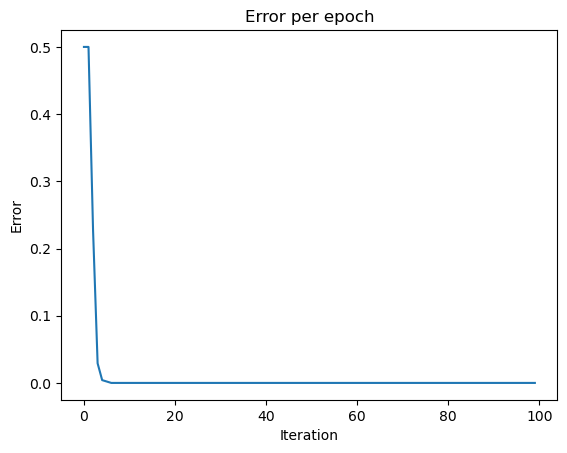

In [ ]:
# Plot loss
plt.plot(lgr_model.loss)
plt.title('Error per epoch')
plt.ylabel('Error')
plt.xlabel('Iteration')

In [ ]:
# Predict test values
y_hat = lgr_model.forward(x_test)

TP = np.sum(y_hat[y_test==1])
TN = np.sum(np.abs(y_hat[y_test==0]-1))
FP = np.sum(y_hat[y_test==0])
FN = np.sum(np.abs(y_hat[y_test==1]-1))

# Accuracy
accuracy = (TP+TN)/len(y_test)
print(f'acc: {accuracy*100:.1f}%')

acc: 99.2%


In [ ]:
#y_hat = lgr_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
print(f"acc_test = {accuracy}")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")

predict : [0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 1 1] 
real :    [0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 0 1 1 1]
*************************************************************************************
total = 120 ,valid = 119 ,invalid = 1
*************************************************************************************
acc_test = 0.9916666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        60

    accuracy                           0.99       120
   macro

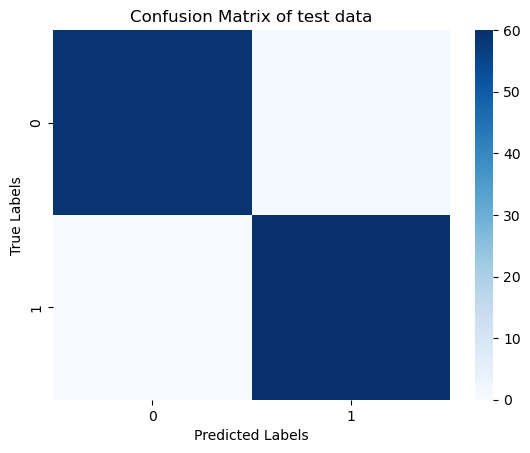

In [ ]:
cm= confusion_matrix(y_test,y_hat)
sns.heatmap(cm, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of test data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 2-3-2 sklearn model

In [ ]:
lgrr_model = LogisticRegression(solver = "sag" , max_iter = 20 , random_state = 54)
lgrr_model.fit(x_train , y_train)
y_hat = lgrr_model.predict(x_test)
print(f"predict : {y_hat} \nreal :    {y_test}")
print("*************************************************************************************")
acc_test = lgrr_model.score(x_test , y_test)
print(f"acc_test = {acc_test}")

acc_train = lgrr_model.score(x_train , y_train)
print(f"acc_train = {acc_train}")

print("*************************************************************************************")
valid = 0
invalid = 0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]:
        valid += 1
    else:
        invalid += 1
print(f"total = {len(x_test)} ,valid = {valid} ,invalid = {invalid}")

print("*************************************************************************************")
# Classification report
class_report = classification_report(y_test, y_hat)
print("Classification Report:")
print(class_report)

print("*************************************************************************************")
lgrr_model.predict_proba(x_test)

predict : [0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 0 1 1 1] 
real :    [0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 0 1 1 1]
*************************************************************************************
acc_test = 1.0
acc_train = 1.0
*************************************************************************************
total = 120 ,valid = 120 ,invalid = 0
*************************************************************************************
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1

array([[9.99371635e-01, 6.28365449e-04],
       [6.40365292e-04, 9.99359635e-01],
       [1.26661127e-04, 9.99873339e-01],
       [9.98074598e-01, 1.92540214e-03],
       [4.62251162e-03, 9.95377488e-01],
       [5.71171444e-04, 9.99428829e-01],
       [9.99519670e-01, 4.80329780e-04],
       [9.95780321e-01, 4.21967897e-03],
       [6.72456001e-04, 9.99327544e-01],
       [5.47378631e-04, 9.99452621e-01],
       [9.99392258e-01, 6.07742315e-04],
       [9.97348272e-01, 2.65172775e-03],
       [2.81636902e-04, 9.99718363e-01],
       [2.23504429e-04, 9.99776496e-01],
       [7.09179488e-04, 9.99290821e-01],
       [9.99183011e-01, 8.16988602e-04],
       [5.29657394e-04, 9.99470343e-01],
       [3.81471702e-04, 9.99618528e-01],
       [9.96891488e-01, 3.10851209e-03],
       [7.87043033e-04, 9.99212957e-01],
       [9.96201676e-01, 3.79832353e-03],
       [9.99134764e-01, 8.65235897e-04],
       [2.20534396e-04, 9.99779466e-01],
       [9.98495216e-01, 1.50478449e-03],
       [9.995119

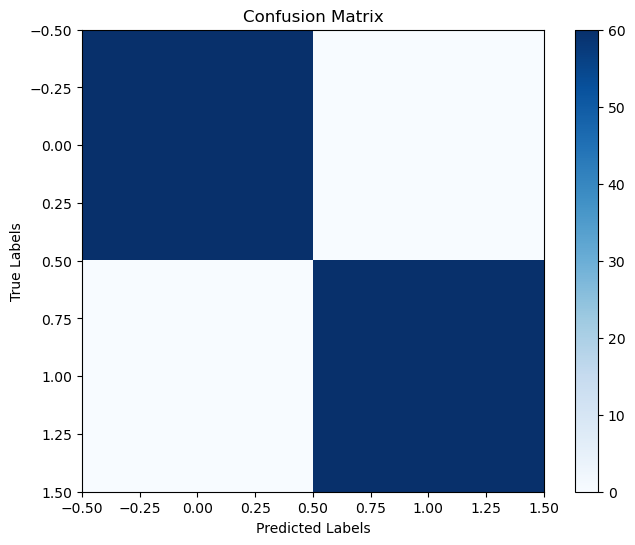

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

best accuracy :1.0 , optimal epoch : 1
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


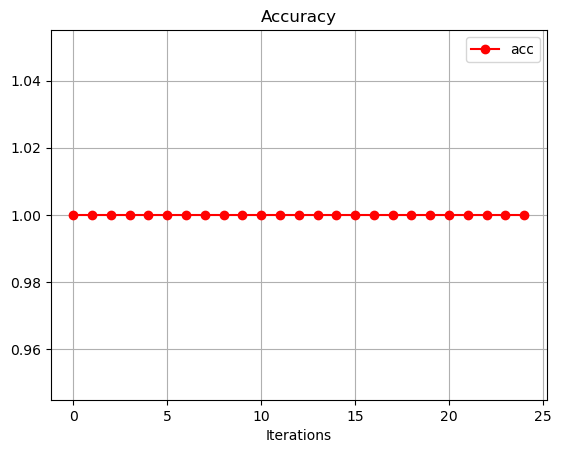

In [ ]:
Epoch = 25
best_acc = 0
optimal_epoch = 0
acc_history = []
for i in range(1,Epoch+1):
    lgrr_model = LogisticRegression(solver = "sag" , max_iter = i , random_state = 54)
    lgrr_model.fit(x_train , y_train)
    acc = lgrr_model.score(x_test , y_test)
    acc_history.append( acc)
    if acc > best_acc :
        best_acc = acc
        optimal_epoch = i

print(f"best accuracy :{best_acc} , optimal epoch : {optimal_epoch}")
print(acc_history)
plt.plot(acc_history, marker='o', color='red',label='acc')
plt.xlabel('Iterations')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

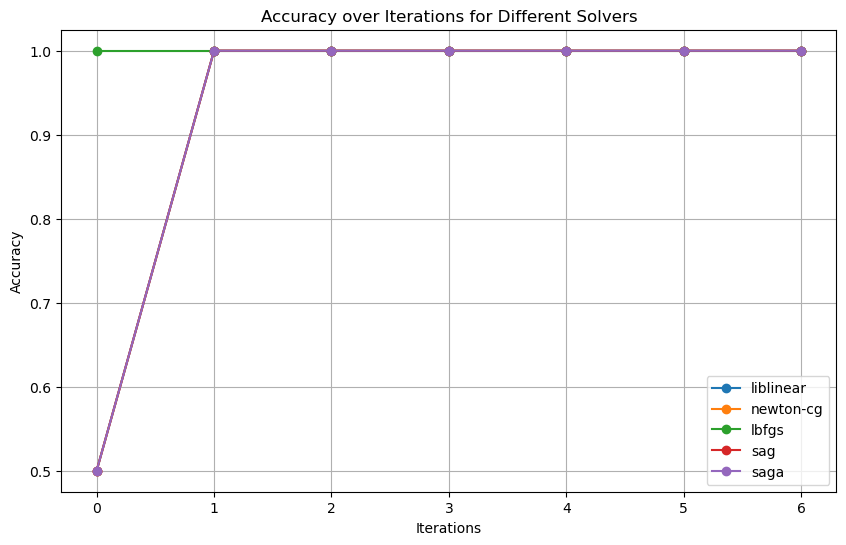

In [ ]:
# Epoch
Epoch = 7

# Solvers to compare
solvers = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]
#solvers = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]

# Dictionary to store accuracy history for each solver
acc_histories = {solver: [] for solver in solvers}

# Train models for each solver and record accuracy history
for solver in solvers:
    best_acc = 0
    for i in range(Epoch):
        lgrr_model = LogisticRegression(solver=solver, max_iter=i, random_state=54)
        lgrr_model.fit(x_train, y_train)
        acc = lgrr_model.score(x_test, y_test)
        acc_histories[solver].append(acc)
        if acc > best_acc:
            best_acc = acc

# Plot accuracy history for each solver
plt.figure(figsize=(10, 6))
for solver in solvers:
    plt.plot(range(Epoch), acc_histories[solver], marker='o' ,label=solver)

plt.title('Accuracy over Iterations for Different Solvers')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()